<a href="https://colab.research.google.com/github/JGuerrero08/Integraci-n-de-Datos-y-Prospectiva/blob/main/Reto1VA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Caso de Estudio Reto 1**

En el marco de la gestión del riesgo operativo, una FINTECH busca estimar las pérdidas económicas asociadas a los fallos tecnológicos que afectan las transacciones realizadas por sus clientes a través de canales electrónicos. Con el fin de modelar la incertidumbre y analizar el comportamiento de dichas pérdidas, se empleará el método de simulación de Montecarlo como referencia para definir la estructura experimental de los datos. Posteriormente, la calidad e integración de los resultados obtenidos serán evaluadas mediante métricas estadísticas descriptivas, específicamente la media, la varianza, el coeficiente de asimetría y la kurtosis, permitiendo caracterizar la distribución de las pérdidas y apoyar la toma de decisiones basada en datos.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
NAL = '/content/drive/MyDrive/Integración de Datos/Base de Datos/1. FallasTecnológicas (1).xlsx'
datos = pd.read_excel(JNALGR, sheet_name=0, header=1)
datos.head(10)

,Fechas,Transacciones Diarias,Valor Transado (millones),Transacciones Fallidas (Freq),Valor Generado Promedio (Millones),Descripción Evento
0,2009-01-01,80,14.8058,1,0.5374,"Errores visuales menores, problemas de usabili..."
1,2009-01-02,105,56.4721,4,1.1978,"Errores en la interfaz de usuario, fallas en f..."
2,2009-01-03,70,9.9760,5,0.4269,"Errores visuales menores, problemas de usabili..."
3,2009-01-04,105,18.2949,6,1.0814,"Errores en la interfaz de usuario, fallas en f..."
4,2009-01-05,130,23.4112,7,1.2105,"Errores en la interfaz de usuario, fallas en f..."
5,2009-01-06,100,31.5177,3,0.2363,"Errores visuales menores, problemas de usabili..."
6,2009-01-07,115,29.5603,1,0.2737,"Errores visuales menores, problemas de usabili..."
7,2009-01-08,90,36.4063,8,12.4245,"Caída total del sistema por más de 24 horas, p..."
8,2009-01-09,105,9.3552,1,2.3869,"Degradación del rendimiento por varias horas, ..."
9,2009-01-10,85,23.7019,7,0.3098,"Errores visuales menores, problemas de usabili..."


In [ ]:
datos.insert(0, 'ID', np.arange(1, len(datos) + 1)) #Se crea una variable donde sea el ID que vendría siendo el día
datos.head()

,ID,Fechas,Transacciones Diarias,Valor Transado (millones),Transacciones Fallidas (Freq),Valor Generado Promedio (Millones),Descripción Evento
0,1,2009-01-01,80,14.8058,1,0.5374,"Errores visuales menores, problemas de usabili..."
1,2,2009-01-02,105,56.4721,4,1.1978,"Errores en la interfaz de usuario, fallas en f..."
2,3,2009-01-03,70,9.9760,5,0.4269,"Errores visuales menores, problemas de usabili..."
3,4,2009-01-04,105,18.2949,6,1.0814,"Errores en la interfaz de usuario, fallas en f..."
4,5,2009-01-05,130,23.4112,7,1.2105,"Errores en la interfaz de usuario, fallas en f..."


In [ ]:
del datos['Fechas'] #Por temas de facilidad se elimina la variable Fecha, para facilitar las operaciones

In [ ]:
datos

,ID,Transacciones Diarias,Valor Transado (millones),Transacciones Fallidas (Freq),Valor Generado Promedio (Millones),Descripción Evento
0,1,80,14.8058,1,0.5374,"Errores visuales menores, problemas de usabili..."
1,2,105,56.4721,4,1.1978,"Errores en la interfaz de usuario, fallas en f..."
2,3,70,9.9760,5,0.4269,"Errores visuales menores, problemas de usabili..."
3,4,105,18.2949,6,1.0814,"Errores en la interfaz de usuario, fallas en f..."
4,5,130,23.4112,7,1.2105,"Errores en la interfaz de usuario, fallas en f..."
...,...,...,...,...,...,...
696,697,120,12.4392,1,0.5747,"Errores visuales menores, problemas de usabili..."
697,698,115,16.5890,6,0.7209,"Errores visuales menores, problemas de usabili..."
698,699,115,24.3684,10,0.3628,"Errores visuales menores, problemas de usabili..."
699,700,80,9.6770,4,0.2715,"Errores visuales menores, problemas de usabili..."


In [ ]:
Freq=datos.iloc[:,3]
Sev=datos.iloc[:,4]


In [ ]:
LDA = Freq*Sev


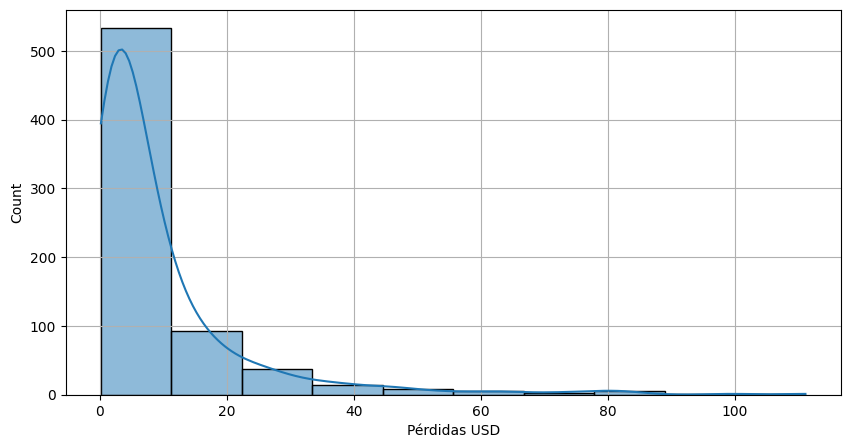

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(LDA,bins=10,kde=True)
plt.xlabel('Pérdidas USD')
plt.grid()    #Mostrar cuadricula
plt.show()

*2*. Se procede con la Clusterización estadistica. La clusterización estadistica esta definida por el histograma de Frecuencia


In [ ]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)
# NI en este caso es la cantidad de Clusters, y por lo general se manejan 10
NI = 10
counts, bin_edges=np.histogram(LDA,bins=NI)
print("El número de datos por intervalo es:")
print(counts)
print("Los intervalos inferiores:")
print(bin_edges[:-1])
print("Los intervalos superiores:")
print(bin_edges[1:])
XC = (bin_edges[:-1]+ bin_edges[1:])/2
print("Los intervalos centrales:")
print(XC)

Tabla =np.column_stack((bin_edges[:-1],bin_edges[1:],XC,counts))
df=pd.DataFrame(Tabla,columns=['Inf','Sup','Cent','Frecuencia'])
df

El número de datos por intervalo es:
[533  93  37  14   9   5   3   5   1   1]
Los intervalos inferiores:
[ 0.14 11.24 22.33 33.42 44.52 55.61 66.71 77.8  88.89 99.99]
Los intervalos superiores:
[ 11.24  22.33  33.42  44.52  55.61  66.71  77.8   88.89  99.99 111.08]
Los intervalos centrales:
[  5.69  16.78  27.88  38.97  50.07  61.16  72.25  83.35  94.44 105.54]


,Inf,Sup,Cent,Frecuencia
0,0.14230,11.23637,5.689335,533.0
1,11.23637,22.33044,16.783405,93.0
2,22.33044,33.42451,27.877475,37.0
3,33.42451,44.51858,38.971545,14.0
4,44.51858,55.61265,50.065615,9.0
5,55.61265,66.70672,61.159685,5.0
6,66.70672,77.80079,72.253755,3.0
7,77.80079,88.89486,83.347825,5.0
8,88.89486,99.98893,94.441895,1.0
9,99.98893,111.08300,105.535965,1.0


*3*.  Se calculan las métricas estadísticas de tendencia central y dispersión

- Media
- Desviación
- Asimetría
- Kurtosis

In [ ]:
u=np.mean(LDA)  #Media
var=np.var(LDA) #Varianza
sigma=np.std(LDA) #Desviación
Tabla2 =np.column_stack((u,var,sigma))
df2=pd.DataFrame(Tabla2,columns=['Media','Varianza','Desviación'])
df2

,Media,Varianza,Desviación
0,9.451113,187.894776,13.707472


In [ ]:
from scipy.stats import skew, kurtosis

# Calcula Skewness y Kurtosis
SK = skew(LDA)
KUR = kurtosis(LDA)

# Crea un Data Frame donde agrega las nuevas variables
df2_temp = df2.copy()
df2_temp['Asimetría'] = SK
df2_temp['Kurtosis'] = KUR

# Display del DataFrame
display(df2_temp)

,Media,Varianza,Desviación,Asimetría,Kurtosis
0,9.451113,187.894776,13.707472,3.34836,14.167714


**Análisis de Resultados**

De lás metricas de tendencia central y dispersión, se logra observar que los datos tiene la tendencia a ubicarse por debajo de la media como lo muestra el coeficiente de asimetría que da cómo valor el siguiente (3.348), que quiere decir que es positiva, lo que acumula muchos valores pequeños y pocos valores con con cifras grandes.
Pasando a la evaluación de la Kurtosis, cómo es un valor cercano a 3 (3.34) quiere decir que es una distribución normal, lo que significa que no hay tanta probabilidad de que suceda un caso extremo, y al observar el histograma se evidencia que los datos se concentran en el lado izquierdo y eso genera la idea de que son menores las pérdidas.
